In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

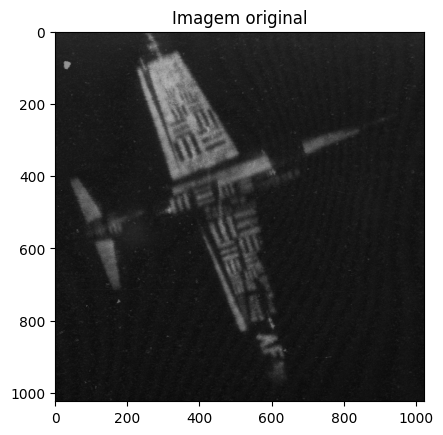

In [3]:
image = cv2.imread('imgs/7.2.01.tiff')
plt.imshow(image)
plt.title('Imagem original')
plt.show()

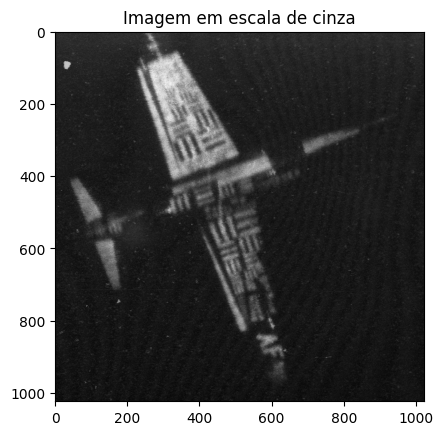

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
"""
#or
gray = []
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        gray[i,j] = image[i][j].sum() // 3

gray = np.array(gray)
"""
plt.imshow(gray, cmap='gray')
plt.title('Imagem em escala de cinza')
plt.show()

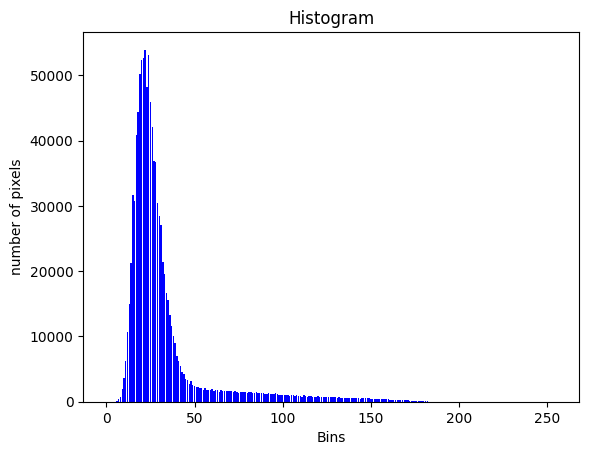

In [5]:
# create a histogram of the image and the gray image

domain = np.arange(0,256)
histGrey = [0]*256
histR = [0]*256
histG = [0]*256
histB = [0]*256

for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        histGrey[gray[i,j]] += 1
        histR[image[i,j,2]] += 1
        histG[image[i,j,1]] += 1
        histB[image[i,j,0]] += 1

histGrey = np.array(histGrey)
histR = np.array(histR)
histG = np.array(histG)
histB = np.array(histB)


# plot a single histogram with all values

plt.figure()
plt.title('Histogram')
plt.xlabel('Bins')
plt.ylabel('number of pixels')
plt.bar(domain,histGrey,color="grey")
plt.bar(domain,histR,color="red")
plt.bar(domain,histG,color="green")
plt.bar(domain,histB,color="blue")
plt.show()

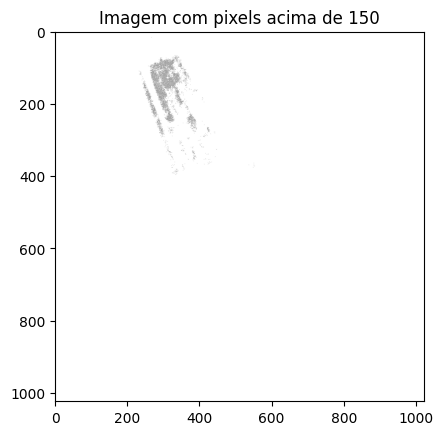

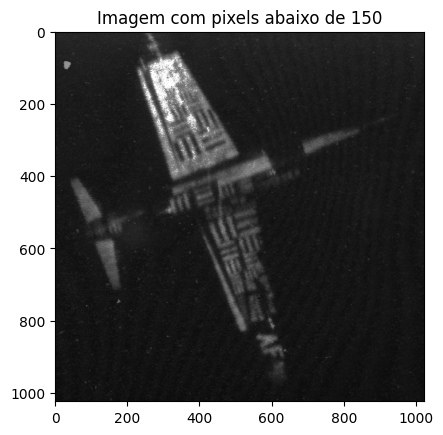

In [7]:
# fill a new array with 255 in the three channels
img_upper_cut = np.zeros(image.shape, np.uint8)
img_lower_cut = np.zeros(image.shape, np.uint8)

cut = 25

for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        # if pixel is more than 150
        if image[i,j].sum() // 3 > cut:
            img_upper_cut[i,j] = image[i,j]
            img_lower_cut[i,j] = 255
        else:
            img_lower_cut[i,j] = image[i,j]
            img_upper_cut[i,j] = 255


img_upper_cut = np.array(img_upper_cut)
img_lower_cut = np.array(img_lower_cut)

plt.imshow(img_upper_cut)
plt.title(f'Imagem com pixels acima de {cut}')
plt.show()

plt.imshow(img_lower_cut)
plt.title(f'Imagem com pixels abaixo de {cut}')
plt.show()
